# KMeans
Creating an implementation of the K-Means algorithm. The algorithm has several steps. 
1. Assign k points to cluster around
2. Assign each point in the data to one of the clusters
3. Move the cluster center point to the mean of that cluster - repeat
4. I will build in functionality to allow feature scaling through max-min normalization. This will drive better results and a quicker algorithm.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Test Data
Sample test data created and displayed below

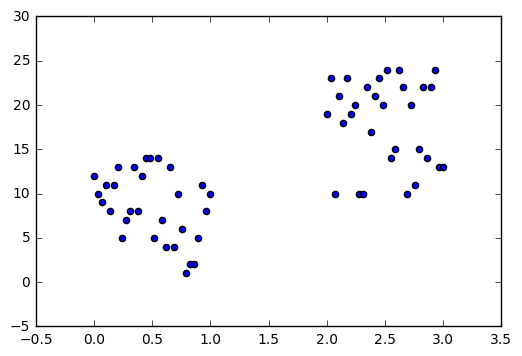

In [69]:
# create testing data
x1 = np.linspace(0,1,num=30)
x2 = np.linspace(2,3,num=30)
y1 = np.random.randint(1,15,30)
y2 = np.random.randint(10,25,30)
X = np.concatenate((x1,x2),axis=0)
Y = np.concatenate((y1,y2),axis=0)
X=X.reshape(len(X),1)
Y=Y.reshape(len(Y),1)
X=np.concatenate((X,Y),axis=1)
plt.scatter(X[:,0],X[:,1])
plt.show()

# 2. Model Build
Construction of the KMeans algorithm

In [72]:
class KMeans:
    """
    The KMeans algorithm is an unsupervized tool 
    to identify clusters.
    Parameters
    -----------
    K : integer
        How many cluster points are desired
    accuracy : float, default 0.00005
        Percentage change in moving mean
    normalize : Boolean, Default True
        Identifies if the data should be
        max-min normalized prior to clustering
    """
    def __init__(self,K,accuracy=0.0005,normalize=True):
        self.K=K
        self.accuracy = accuracy
        self.normalize=normalize
    def initial_point(self,X):
        # identifies random start points for k clustering points
        m,n = X.shape
        min_list=[]
        max_list=[]
        for i in range(n):
            min_list.append(np.min(X[:,i]))
            max_list.append(np.max(X[:,i]))
        min_arr = np.array(min_list)
        min_arr = min_arr.reshape(1,n)
        max_arr = np.array(max_list)
        max_arr = max_arr.reshape(1,n)
        rand_start = np.random.rand(self.K,n)
        rand_start*=max_arr
        rand_start+=min_arr
        return rand_start
    def mm_normalization(self,X):
        """max-min normalization"""
        m,n = X.shape
        Xnorm = np.zeros_like(X)
        for scale in range(n):
            Xnorm[:,scale]=(X[:,scale]-np.min(X[:,scale]))/(np.max(X[:,scale])-np.min(X[:,scale]))
        return Xnorm
    def cluster_denormalization(self,X,cluster_points):
        """Takes the clusters and denormalizes them for
        general use"""
        m,n = X.shape
        for scale in range(n):
            cluster_points[:,scale] = cluster_points[:,scale]*(np.max(X[:,scale])-np.min(X[:,scale]))+np.min(X[:,scale])
        return cluster_points
    def fit(self,X):
        """fits clusters to data"""
        self.X = X.copy()
        m,n = X.shape
        if self.normalize == True:
            norm_X = self.mm_normalization(X)
        else:
            norm_X =  X.copy()
        cluster_points = self.initial_point(norm_X)
        difference = float('inf')
        while difference > self.accuracy:
            k_parent = self.closest_point(norm_X,cluster_points)
            previous_cluster = cluster_points.copy()
            cluster_points = self.update_cluster(cluster_points,norm_X,k_parent)
            difference = np.sum(np.abs(cluster_points-previous_cluster))/np.sum(previous_cluster)
        if self.normalize == True:
            self.normalized_cluster_points = cluster_points.copy()
            cluster_points = self.cluster_denormalization(self.X,cluster_points)
        self.cluster_points = cluster_points
        print('Model fitted')
    def cluster_ctr(self):
        """returns central cluster points"""
        return self.cluster_points
    def closest_point(self,X,cluster_point):
        """Identifies closest point"""
        m,n=X.shape
        first_run = True
        for k in range(self.K):
            comparison_arr = np.sqrt(np.sum((X-cluster_point[k,:])**2,axis=1)).reshape(m,1)
            if first_run == True:
                distance_arr = comparison_arr
                first_run = False
            else:
                distance_arr = np.concatenate((distance_arr,comparison_arr),axis=1)
        return np.argmin(distance_arr,axis=1)
    def update_cluster(self,cluster_points,X,k_parent):
        """Updates cluster centre to move them to the mean of
        all points allocated to them """
        for k in range(self.K):
            cluster_points[k,:]=np.mean(X[k_parent==k],axis=0)
        return cluster_points
    def predict(self,data):
        """Predicts based on cluster centre points"""
        if self.normalize == True:
            data = self.mm_normalization(data)
            clust = self.normalized_cluster_points
        elif self.normalize == False:
            clust = self.cluster_points
        return self.closest_point(data,clust)

# 3. Testing
- Fitting model
- Reporting clustering
- producing new test data
- using prediction to display predicted result

In [73]:
# Create the model and fit it
t=KMeans(K=2)
t.fit(X)
t.cluster_ctr()

Model fitted


array([[ 0.5       ,  8.56666667],
       [ 2.5       , 17.96666667]])

In [74]:
# Creation of test data
xt1 = np.linspace(0,1,num=30)
xt2 = np.linspace(2,3,num=30)
yt1 = np.random.randint(1,15,30)
yt2 = np.random.randint(10,25,30)
Xt = np.concatenate((xt1,xt2),axis=0)
Yt = np.concatenate((yt1,yt2),axis=0)
Xt=Xt.reshape(len(Xt),1)
Yt=Yt.reshape(len(Yt),1)
Xt=np.concatenate((Xt,Yt),axis=1)

In [75]:
# prediction
selec=t.predict(Xt)

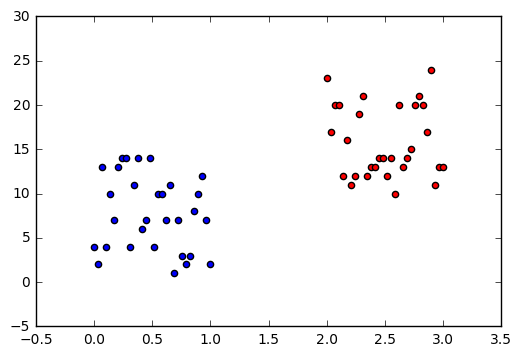

In [76]:
# graphing prediction results
color=['b','r']
for col,i in enumerate(np.unique(selec)):
    plt.scatter(Xt[selec==i,0],Xt[selec==i,1],c=color[col])
plt.show()